# K-Nearest Neighbour using SKLearn 

### Importing Libraries & Dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
%matplotlib inline

In [4]:
df = pd.read_csv('Social_Network_Ads.csv')

In [5]:
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
##X = df.iloc[:,2:5].values
#y = df.iloc[:,4].values
#Y = df.iloc[:,4].values      # extracting labels of entire dataset
X = df.iloc[:,2:5].values    # Dropping unnecessary columns

X.shape

(400, 3)

In [8]:
#Y = Y[300:]                  ## taking only the label of last 100 data for testing ( these are the true labels of the test data )
#Y.shape
#print(Y)

In [9]:
#Y

In [10]:
X.shape

(400, 3)

In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test = train_test_split(X,test_size=0.25, random_state=0)
print('Train data shape'+str(X_train.shape))

Y = X_test[:,-1]
X_test = np.delete(X_test, -1, 1)
print('Test data shape'+str(X_test.shape))
print("True Label shape "+ str(Y.shape))

Train data shape(300, 3)
Test data shape(100, 2)
True Label shape (100,)


In [13]:
X_test[0]

array([   30, 87000])

In [14]:
# Example of making predictions
from math import sqrt
 
# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)-1):
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)
 
# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
	distances = list()
	for train_row in train:
		dist = euclidean_distance(test_row, train_row)
		distances.append((train_row, dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(num_neighbors):
		neighbors.append(distances[i][0])
	return neighbors
 
# Make a classification prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
	neighbors = get_neighbors(train, test_row, num_neighbors)              ### calculates the msot nearest 3 neighbors from the entire train set.
	output_values = [row[-1] for row in neighbors]                         ### extracts the last column i.e the label of the nearest neighbors representing their class number.
	prediction = max(set(output_values), key=output_values.count)          ### stores the most occuring class label
	return prediction

In [15]:
##prediction = predict_classification(X, X[399], 3)
##print('Expected %d, Got %d.' % (X[399][-1], prediction))
accurate = 0
inaccurate = 0
i = 0
for i in range(100):
  prediction = predict_classification(X_train, X_test[i], 3)     ### X_train = all of train set; X_test[i] = first row of the test set; 3 = number of nearest neighbors
  print('Expected %d, Got %d.' % (Y[i], prediction))
  if prediction == Y[i]:
    accurate += 1
  else:
    inaccurate += 1 
  i += 1

print('Accuracy: '+ str(accurate/(accurate+inaccurate)))

Expected 0, Got 0.
Expected 0, Got 0.
Expected 0, Got 0.
Expected 0, Got 0.
Expected 0, Got 0.
Expected 0, Got 0.
Expected 0, Got 0.
Expected 1, Got 0.
Expected 0, Got 0.
Expected 0, Got 1.
Expected 0, Got 0.
Expected 0, Got 0.
Expected 0, Got 1.
Expected 0, Got 0.
Expected 0, Got 0.
Expected 0, Got 1.
Expected 0, Got 1.
Expected 0, Got 0.
Expected 1, Got 1.
Expected 0, Got 0.
Expected 0, Got 0.
Expected 1, Got 1.
Expected 0, Got 0.
Expected 1, Got 1.
Expected 0, Got 0.
Expected 1, Got 0.
Expected 0, Got 0.
Expected 0, Got 0.
Expected 0, Got 1.
Expected 0, Got 1.
Expected 0, Got 0.
Expected 1, Got 1.
Expected 1, Got 1.
Expected 0, Got 1.
Expected 0, Got 0.
Expected 0, Got 0.
Expected 0, Got 0.
Expected 0, Got 0.
Expected 0, Got 0.
Expected 1, Got 0.
Expected 0, Got 0.
Expected 0, Got 0.
Expected 0, Got 0.
Expected 0, Got 0.
Expected 1, Got 0.
Expected 0, Got 0.
Expected 0, Got 1.
Expected 1, Got 1.
Expected 0, Got 0.
Expected 1, Got 0.
Expected 1, Got 1.
Expected 0, Got 0.
Expected 0, 

In [ ]:
#-------------------------------------------------->>>>>>>>>>>>>>>>>>>>> END OF CODE <<<<<<<<<<<<<<<<<<<<<<<<<<<<<---------------------------------------------------------------

### Train - Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test = train_test_split(X,test_size=0.25, random_state=0)

In [ ]:
X_train.shape

(300, 3)

In [ ]:
X_train

array([[    44,  39000,      0],
       [    32, 120000,      1],
       [    38,  50000,      0],
       [    32, 135000,      1],
       [    52,  21000,      1],
       [    53, 104000,      1],
       [    39,  42000,      0],
       [    38,  61000,      0],
       [    36,  50000,      0],
       [    36,  63000,      0],
       [    35,  25000,      0],
       [    35,  50000,      0],
       [    42,  73000,      1],
       [    47,  49000,      1],
       [    59,  29000,      1],
       [    49,  65000,      0],
       [    45, 131000,      1],
       [    31,  89000,      0],
       [    46,  82000,      0],
       [    47,  51000,      1],
       [    26,  15000,      0],
       [    60, 102000,      1],
       [    38, 112000,      0],
       [    40, 107000,      1],
       [    42,  53000,      0],
       [    35,  59000,      0],
       [    48,  41000,      1],
       [    48, 134000,      1],
       [    38, 113000,      1],
       [    29, 148000,      1],
       [  

In [ ]:
X_test.shape

(100, 3)

In [ ]:
X_test = np.delete(X_test, -1, 1)

In [ ]:
X_test.shape

(100, 2)

In [ ]:
X_test

array([[    30,  87000],
       [    38,  50000],
       [    35,  75000],
       [    30,  79000],
       [    35,  50000],
       [    27,  20000],
       [    31,  15000],
       [    36, 144000],
       [    18,  68000],
       [    47,  43000],
       [    30,  49000],
       [    28,  55000],
       [    37,  55000],
       [    39,  77000],
       [    20,  86000],
       [    32, 117000],
       [    37,  77000],
       [    19,  85000],
       [    55, 130000],
       [    35,  22000],
       [    35,  47000],
       [    47, 144000],
       [    41,  51000],
       [    47, 105000],
       [    23,  28000],
       [    49, 141000],
       [    28,  87000],
       [    29,  80000],
       [    37,  62000],
       [    32,  86000],
       [    21,  88000],
       [    37,  79000],
       [    57,  60000],
       [    37,  53000],
       [    24,  58000],
       [    18,  52000],
       [    22,  81000],
       [    34,  43000],
       [    31,  34000],
       [    49,  36000],


### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc_X = StandardScaler()

In [ ]:
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [ ]:
print(X_train,"\n-------------------------------\n",X_test)

[[ 0.58164944 -0.88670699 -0.76635604]
 [-0.60673761  1.46173768  1.30487651]
 [-0.01254409 -0.5677824  -0.76635604]
 [-0.60673761  1.89663484  1.30487651]
 [ 1.37390747 -1.40858358  1.30487651]
 [ 1.47293972  0.99784738  1.30487651]
 [ 0.08648817 -0.79972756 -0.76635604]
 [-0.01254409 -0.24885782 -0.76635604]
 [-0.21060859 -0.5677824  -0.76635604]
 [-0.21060859 -0.19087153 -0.76635604]
 [-0.30964085 -1.29261101 -0.76635604]
 [-0.30964085 -0.5677824  -0.76635604]
 [ 0.38358493  0.09905991  1.30487651]
 [ 0.8787462  -0.59677555  1.30487651]
 [ 2.06713324 -1.17663843  1.30487651]
 [ 1.07681071 -0.13288524 -0.76635604]
 [ 0.68068169  1.78066227  1.30487651]
 [-0.70576986  0.56295021 -0.76635604]
 [ 0.77971394  0.35999821 -0.76635604]
 [ 0.8787462  -0.53878926  1.30487651]
 [-1.20093113 -1.58254245 -0.76635604]
 [ 2.1661655   0.93986109  1.30487651]
 [-0.01254409  1.22979253 -0.76635604]
 [ 0.18552042  1.08482681  1.30487651]
 [ 0.38358493 -0.48080297 -0.76635604]
 [-0.30964085 -0.30684411

## Model creation and fitting

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 5,p=2, metric = 'minkowski')
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

## Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,y_pred)
cm

array([[64,  4],
       [ 3, 29]], dtype=int64)

In [ ]:
accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])*100
print('Accuracy = ',accuracy,'%')

Accuracy =  93.0 %


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



### Visualization

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


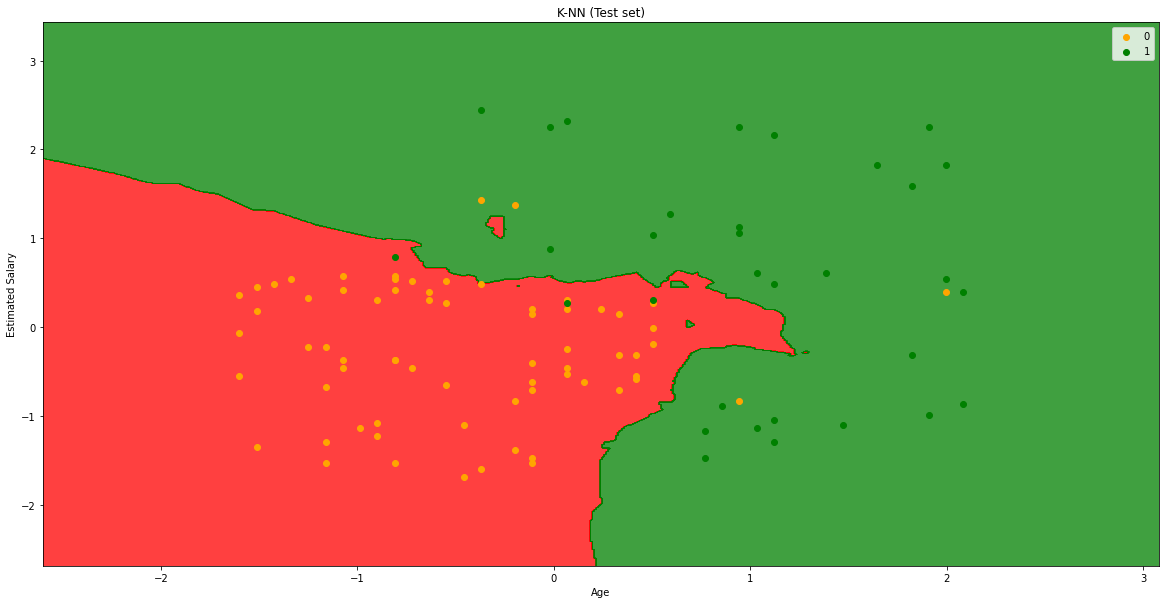

In [ ]:
plt.figure(figsize=(20,10))
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('orange', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Confusion Matrix')

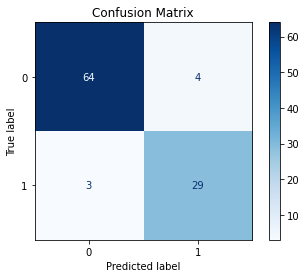

In [ ]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix')

# Hyperparameter Optimization

In [ ]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

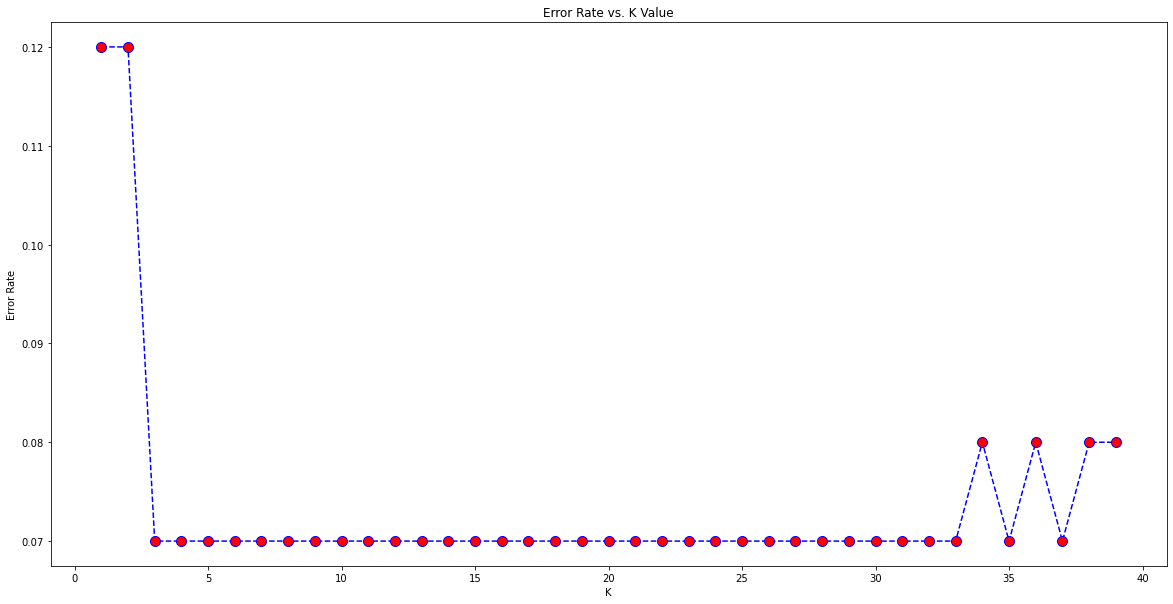

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Conclusion
Seems we have chosen the correct n_neighbour value. So, that is how we implement KNN using Sklearn.